In [14]:
import os
import tensorflow as tf
import random
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Layer, Average
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
import fnmatch

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression

In [3]:
import cv2
import pandas as pd
from tensorflow.keras.layers import BatchNormalization
import time
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials, anneal
import matplotlib.pyplot as plt
import statistics 

In [4]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Model,load_model,Sequential
from tensorflow.keras.applications.xception import  Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import  ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
#from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
#from keras.applications.mobilenet import MobileNet
import tensorflow.keras.callbacks as kcallbacks
import tensorflow.keras
#from keras.preprocessing.image import load_img,img_to_array
import math
import random
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
seed=24
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
import seaborn as sns

In [6]:
target_img = (224,224)
input_img = (224,224,3)
batch = 32

train_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)
                                #    horizontal_flip=True,
                                #    zoom_range = 0.2,
                                #    vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
        'Selected Features/Train_224x224/',
        target_size = target_img,
        batch_size = batch,
        class_mode = 'binary')
validation_generator = valid_datagen.flow_from_directory(
        'Selected Features/Test_224x224/',
        target_size = target_img,
        batch_size = batch,
        class_mode = 'binary')

Found 1498 images belonging to 2 classes.
Found 703 images belonging to 2 classes.


In [7]:
label = {v: k for k, v in validation_generator.class_indices.items()}
print(label)

{0: '0', 1: '1'}


In [8]:
directory = './Selected Features/Test_224x224/'

test_images = []

for subdir, _, files in os.walk(directory):
    for file in files:
        if fnmatch.fnmatch(file, '*.png'):
            test_images.append(os.path.join(subdir, file))

test_labels = [os.path.basename(os.path.dirname(image_path)) for image_path in test_images]

print(test_labels[0], test_images[0])

1 ./Selected Features/Test_224x224/1/357.png


In [9]:
y_test = np.array(test_labels).astype(int)
print(y_test.shape)

(703,)


In [10]:
#Test Images 
length = len(test_images)
batch_size = length  # Set the batch size equal to the number of images

# Create an empty array to store the images
images = np.empty((batch_size, 224, 224, 3), dtype=np.float32)

for i in range(length):
    test = cv2.imread(test_images[i])
    test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
    img = np.array(test) / 255.0
    
    # Assign the image to the corresponding index in the images array
    images[i] = img

In [92]:
output_unit = 1

In [93]:
def Prediction(model):
#read images from validation folder
    directory = './Selected Features/Test_224x224/'

    image_files = []

    for subdir, _, files in os.walk(directory):
        for file in files:
            if fnmatch.fnmatch(file, '*.png'):
                image_files.append(os.path.join(subdir, file))

    test_labels = [os.path.basename(os.path.dirname(image_path)) for image_path in image_files]
            
    y_test = np.array(test_labels).astype(int)

    #predict=[]
    #length=len(test_images)
    label=validation_generator.class_indices
    label={v: k for k, v in label.items()}
    
    length = len(test_images)
    batch_size = length  # Set the batch size equal to the number of images

    # Create an empty array to store the images
    images = np.empty((batch_size, 224, 224, 3), dtype=np.float32)

    for i in range(length):
        test = cv2.imread(test_images[i])
        test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
        img = np.array(test) / 255.

        # Assign the image to the corresponding index in the images array
        images[i] = img
    
    preds = model.predict(images)
    prediction = (preds > 0.5).astype(int)
    accuracy1 = accuracy_score(y_test, prediction)
    print(accuracy1)
    
    return accuracy1

# VGG19

In [194]:
def Vgg19(output_unit, frozen, unit, epochs,patience, lr, dropout_rate, verbose=2, path='./Reference Paper/VGG19.h5',input_shape=input_img):
    
    base_model = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
    
    for layer in base_model.layers[:frozen]:
        layer.trainable = False
    for layer in base_model.layers[frozen:]:
        layer.trainable = True

    model = Flatten()(base_model.output)
    
    model=Dense(units = unit,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(output_unit, activation='sigmoid')(model)
    
    model = Model(base_model.input, model, name='vgg19')
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_accuracy',  mode='auto', patience=patience, verbose=verbose)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = path, 
                                                          monitor='val_accuracy', 
                                                          mode='auto', verbose=verbose, 
                                                          save_best_only=True)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping,model_checkpoint],
        verbose = verbose
    )
    return history

In [195]:
#15-18
def objective(params):
    
    params = {
        'frozen': int(params['frozen']),
        'unit': int(params['unit']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
    
    frozen=params['frozen']
    unit = params['unit']
    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    Vgg19(output_unit = 1, frozen=frozen, unit = unit, epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)

    accuracy = Prediction(model=load_model('./Reference Paper/VGG19.h5'))

    print('accuracy:%s'%accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [96]:
space = {
    'frozen': hp.quniform('frozen', 17, 21, 1),
    'unit': hp.quniform('unit', 128, 512, 128),
    'epochs': hp.quniform('epochs', 10, 30, 5),
    'patience': hp.quniform('patience', 2, 10, 1),
    'lr': hp.quniform('lr', 0.001, 0.005, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.1, 0.5, 0.1),
}

optimal_parameter = fmin(fn=objective,
                         space=space,
                         algo=tpe.suggest,
                         max_evals=10)
print("Best Optimal Parameters using TPE {}".format(optimal_parameter))

Epoch 1/30                                            

                                                      
Epoch 1: val_accuracy improved from -inf to 0.55050, saving model to ./Reference Paper/VGG19.h5

47/47 - 9s - loss: 4.1562 - accuracy: 0.6048 - val_loss: 0.6871 - val_accuracy: 0.5505 - 9s/epoch - 190ms/step

Epoch 2/30                                            

                                                      
Epoch 2: val_accuracy improved from 0.55050 to 0.79374, saving model to ./Reference Paper/VGG19.h5

47/47 - 7s - loss: 0.3920 - accuracy: 0.8458 - val_loss: 0.4077 - val_accuracy: 0.7937 - 7s/epoch - 150ms/step

Epoch 3/30                                            

                                                      
Epoch 3: val_accuracy did not improve from 0.79374

47/47 - 6s - loss: 0.2805 - accuracy: 0.9206 - val_loss: 5.6148 - val_accuracy: 0.7852 - 6s/epoch - 123ms/step

Epoch 4/30                                            

                          

In [199]:
Vgg19(output_unit = 1, frozen=20, unit = 384, epochs=30, patience=9, lr=0.001, dropout_rate=0.2,verbose=1)

Epoch 1/30
47/47 [==============================] - ETA: 0s - loss: 0.4345 - accuracy: 0.9039
Epoch 1: val_accuracy improved from -inf to 0.96302, saving model to ./Reference Paper/VGG19.h5
47/47 [==============================] - 11s 216ms/step - loss: 0.4345 - accuracy: 0.9039 - val_loss: 0.1379 - val_accuracy: 0.9630
Epoch 2/30
47/47 [==============================] - ETA: 0s - loss: 0.0543 - accuracy: 0.9846
Epoch 2: val_accuracy did not improve from 0.96302
47/47 [==============================] - 6s 127ms/step - loss: 0.0543 - accuracy: 0.9846 - val_loss: 0.3566 - val_accuracy: 0.8777
Epoch 3/30
47/47 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9927
Epoch 3: val_accuracy did not improve from 0.96302
47/47 [==============================] - 6s 124ms/step - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.1436 - val_accuracy: 0.9602
Epoch 4/30
47/47 [==============================] - ETA: 0s - loss: 0.0302 - accuracy: 0.9880
Epoch 4: val_accuracy did not im

In [200]:
vgg19 = load_model('./Reference Paper/VGG19.h5')

In [201]:
vgg19_pred = vgg19.predict(images)
vgg19_pred = (vgg19_pred > 0.5).astype(int)

In [202]:
accuracy1 = accuracy_score(y_test, vgg19_pred)
precision1 =precision_score(y_test, vgg19_pred, average='weighted')
recall = recall_score(y_test, vgg19_pred, average='weighted')
f1 = f1_score(y_test, vgg19_pred, average='weighted')

output = (
    "Evaluation Metrics of VGG19:\n"
    f"Testing Accuracy: {accuracy1 * 100}\n"
    f"Precision: {precision1}\n"
    f"Recall: {recall}\n"
    f"F1-Score: {f1}"
)

print(output)

Evaluation Metrics of VGG19:
Testing Accuracy: 96.30156472261734
Precision: 0.9649753374591417
Recall: 0.9630156472261735
F1-Score: 0.9628418485759206


In [203]:
target_names = ['Normal', 'Attack']
print(classification_report(y_test, vgg19_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       1.00      0.92      0.96       316
      Attack       0.94      1.00      0.97       387

    accuracy                           0.96       703
   macro avg       0.97      0.96      0.96       703
weighted avg       0.96      0.96      0.96       703



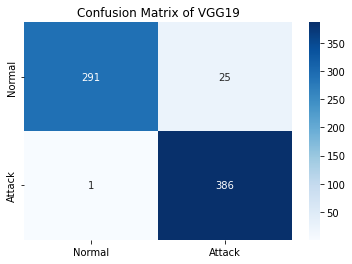

In [204]:
target_names = ['Normal', 'Attack']
conf_mat1 = confusion_matrix(y_test, vgg19_pred)
sns.heatmap(conf_mat1, annot=True, fmt = 'd', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of VGG19')
plt.show()

# Xception

In [238]:
def Xception_model(output_unit, frozen, unit, epochs,patience, lr, dropout_rate, verbose=2, path='./Reference Paper/Xception.h5',input_shape=input_img):
    
    base_model = Xception(include_top=False, weights='imagenet', input_shape=input_shape)
    
    for layer in base_model.layers[:frozen]:
        layer.trainable = False
    for layer in base_model.layers[frozen:]:
        layer.trainable = True

    model = Flatten()(base_model.output)
    
    model=Dense(units = unit,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(output_unit, activation='sigmoid')(model)
    
    model = Model(base_model.input, model, name='xception')
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_accuracy',  mode='auto', patience=patience, verbose=verbose)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = path, 
                                                          monitor='val_accuracy', 
                                                          mode='auto', verbose=verbose, 
                                                          save_best_only=True)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping,model_checkpoint],
        verbose = verbose
    )
    return history

In [106]:
#122-131
def objective(params):
    
    params = {
        'frozen': int(params['frozen']),
        'unit': int(params['unit']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
    
    frozen=params['frozen']
    unit = params['unit']
    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    Xception_model(output_unit = 1, frozen=frozen, unit = unit, epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)

    accuracy = Prediction(model=load_model('./Reference Paper/Xception.h5'))

    print('accuracy:%s'%accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [107]:
space = {
    'frozen': hp.quniform('frozen', 122, 131, 1),
    'unit': hp.quniform('unit', 128, 512, 128),
    'epochs': hp.quniform('epochs', 10, 30, 5),
    'patience': hp.quniform('patience', 2, 10, 1),
    'lr': hp.quniform('lr', 0.001, 0.005, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.1, 0.5, 0.1),
}

optimal_parameter = fmin(fn=objective,
                         space=space,
                         algo=tpe.suggest,
                         max_evals=10)
print("Best Optimal Parameters using TPE {}".format(optimal_parameter))

Epoch 1/15                                            

                                                      
Epoch 1: val_accuracy improved from -inf to 0.83784, saving model to ./Reference Paper/Xception.h5

47/47 - 12s - loss: 1.3439 - accuracy: 0.9393 - val_loss: 1.1812 - val_accuracy: 0.8378 - 12s/epoch - 254ms/step

Epoch 2/15                                            

                                                      
Epoch 2: val_accuracy did not improve from 0.83784

47/47 - 6s - loss: 0.0622 - accuracy: 0.9846 - val_loss: 1.4836 - val_accuracy: 0.8208 - 6s/epoch - 120ms/step

Epoch 3/15                                            

                                                      
Epoch 3: val_accuracy improved from 0.83784 to 0.84780, saving model to ./Reference Paper/Xception.h5

47/47 - 7s - loss: 0.0327 - accuracy: 0.9927 - val_loss: 1.0418 - val_accuracy: 0.8478 - 7s/epoch - 157ms/step

Epoch 4/15                                            

                  

In [250]:
Xception_model(output_unit = 1, frozen=125, unit = 512, epochs=30, patience=6, lr=0.003, dropout_rate=0.4,verbose=1)

Epoch 1/30
47/47 [==============================] - ETA: 0s - loss: 1.8146 - accuracy: 0.9366
Epoch 1: val_accuracy improved from -inf to 0.81366, saving model to ./Reference Paper/Xception.h5
47/47 [==============================] - 15s 278ms/step - loss: 1.8146 - accuracy: 0.9366 - val_loss: 7.5961 - val_accuracy: 0.8137
Epoch 2/30
47/47 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.9833
Epoch 2: val_accuracy improved from 0.81366 to 0.82646, saving model to ./Reference Paper/Xception.h5
47/47 [==============================] - 22s 476ms/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 4.1243 - val_accuracy: 0.8265
Epoch 3/30
47/47 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9920
Epoch 3: val_accuracy improved from 0.82646 to 0.87624, saving model to ./Reference Paper/Xception.h5
47/47 [==============================] - 11s 242ms/step - loss: 0.0197 - accuracy: 0.9920 - val_loss: 1.3127 - val_accuracy: 0.8762
Epoch 4/30
47/47 [=

In [251]:
xception = load_model('./Reference Paper/Xception.h5')

In [252]:
xception_pred = xception.predict(images)
xception_pred = (xception_pred > 0.5).astype(int)

In [253]:
accuracy2 = accuracy_score(y_test, xception_pred)
precision2 =precision_score(y_test, xception_pred, average='weighted')
recall2 = recall_score(y_test, xception_pred, average='weighted')
f1_2 = f1_score(y_test, xception_pred, average='weighted')

output = (
    "Evaluation Metrics of VGG19:\n"
    f"Testing Accuracy: {accuracy2 * 100}\n"
    f"Precision: {precision2}\n"
    f"Recall: {recall2}\n"
    f"F1-Score: {f1_2}"
)

print(output)

Evaluation Metrics of VGG19:
Testing Accuracy: 91.8918918918919
Precision: 0.9219579246081012
Recall: 0.918918918918919
F1-Score: 0.9183432583895562


# ResNet50

In [261]:
def Resnet(output_unit, frozen, unit, epochs,patience, lr, dropout_rate, verbose=2, path='./Reference Paper/Resnet50.h5',input_shape=input_img):
    
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    
    for layer in base_model.layers[:frozen]:
        layer.trainable = False
    for layer in base_model.layers[frozen:]:
        layer.trainable = True

    model = Flatten()(base_model.output)
    
    model=Dense(units = unit,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(output_unit, activation='sigmoid')(model)
    
    model = Model(base_model.input, model, name='resnet')
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_accuracy',  mode='auto', patience=patience, verbose=verbose)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = path, 
                                                          monitor='val_accuracy', 
                                                          mode='auto', verbose=verbose, 
                                                          save_best_only=True)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping,model_checkpoint],
        verbose = verbose
    )
    return history

In [262]:
#122-131
def objective(params):
    
    params = {
        'frozen': int(params['frozen']),
        'unit': int(params['unit']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
    
    frozen=params['frozen']
    unit = params['unit']
    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    Resnet(output_unit = 1, frozen=frozen, unit = unit, epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)

    accuracy = Prediction(model=load_model('./Reference Paper/Resnet50.h5'))

    print('accuracy:%s'%accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [263]:
space = {
    'frozen': hp.quniform('frozen', 165, 174, 1),
    'unit': hp.quniform('unit', 128, 512, 128),
    'epochs': hp.quniform('epochs', 10, 30, 5),
    'patience': hp.quniform('patience', 2, 10, 1),
    'lr': hp.quniform('lr', 0.001, 0.005, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.1, 0.5, 0.1),
}

optimal_parameter = fmin(fn=objective,
                         space=space,
                         algo=tpe.suggest,
                         max_evals=10)
print("Best Optimal Parameters using TPE {}".format(optimal_parameter))

Epoch 1/15                                            

                                                      
Epoch 1: val_accuracy improved from -inf to 0.44950, saving model to ./Reference Paper/Resnet50.h5

47/47 - 14s - loss: 5.5139 - accuracy: 0.6469 - val_loss: 4.4198 - val_accuracy: 0.4495 - 14s/epoch - 300ms/step

Epoch 2/15                                            

                                                      
Epoch 2: val_accuracy did not improve from 0.44950

47/47 - 6s - loss: 0.4913 - accuracy: 0.6849 - val_loss: 0.7091 - val_accuracy: 0.4495 - 6s/epoch - 121ms/step

Epoch 3/15                                            

                                                      
Epoch 3: val_accuracy improved from 0.44950 to 0.46799, saving model to ./Reference Paper/Resnet50.h5

47/47 - 12s - loss: 0.4410 - accuracy: 0.6736 - val_loss: 0.6963 - val_accuracy: 0.4680 - 12s/epoch - 258ms/step

Epoch 4/15                                            

                

In [264]:
Resnet(output_unit = 1, frozen=172, unit = 384, epochs=20, patience=4, lr=0.004, dropout_rate=0.2, verbose=1)

Epoch 1/20
47/47 [==============================] - ETA: 0s - loss: 13.8940 - accuracy: 0.8111
Epoch 1: val_accuracy improved from -inf to 0.59602, saving model to ./Reference Paper/Resnet50.h5
47/47 [==============================] - 14s 233ms/step - loss: 13.8940 - accuracy: 0.8111 - val_loss: 2.2930 - val_accuracy: 0.5960
Epoch 2/20
47/47 [==============================] - ETA: 0s - loss: 0.2690 - accuracy: 0.9326
Epoch 2: val_accuracy did not improve from 0.59602
47/47 [==============================] - 6s 125ms/step - loss: 0.2690 - accuracy: 0.9326 - val_loss: 0.5996 - val_accuracy: 0.5733
Epoch 3/20
47/47 [==============================] - ETA: 0s - loss: 0.1093 - accuracy: 0.9646
Epoch 3: val_accuracy did not improve from 0.59602
47/47 [==============================] - 6s 129ms/step - loss: 0.1093 - accuracy: 0.9646 - val_loss: 0.6812 - val_accuracy: 0.5832
Epoch 4/20
47/47 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 0.9766
Epoch 4: val_accuracy impro

In [265]:
resnet = load_model('./Reference Paper/Resnet50.h5')

In [266]:
resnet_pred = resnet.predict(images)
resnet_pred = (resnet_pred > 0.5).astype(int)


In [267]:
accuracy3 = accuracy_score(y_test, resnet_pred)
precision3 =precision_score(y_test, resnet_pred, average='weighted')
recall3 = recall_score(y_test, resnet_pred, average='weighted')
f1_3 = f1_score(y_test, resnet_pred, average='weighted')

output = (
    "Evaluation Metrics of Resnet50:\n"
    f"Testing Accuracy: {accuracy3 * 100}\n"
    f"Precision: {precision3}\n"
    f"Recall: {recall3}\n"
    f"F1-Score: {f1_3}"
)

print(output)

Evaluation Metrics of Resnet50:
Testing Accuracy: 93.45661450924608
Precision: 0.9368725256645358
Recall: 0.9345661450924608
F1-Score: 0.934191703205036


# InceptionV3


In [282]:
def Inception(output_unit, frozen, unit, epochs,patience, lr, dropout_rate, verbose=2, path='./Reference Paper/InceptionV3.h5',input_shape=input_img):
    
    base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)
    
    for layer in base_model.layers[:frozen]:
        layer.trainable = False
    for layer in base_model.layers[frozen:]:
        layer.trainable = True

    model = Flatten()(base_model.output)
    
    model=Dense(units = unit,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(output_unit, activation='sigmoid')(model)
    
    model = Model(base_model.input, model, name='inception')
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_accuracy',  mode='auto', patience=patience, verbose=verbose)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = path, 
                                                          monitor='val_accuracy', 
                                                          mode='auto', verbose=verbose, 
                                                          save_best_only=True)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping,model_checkpoint],
        verbose = verbose
    )
    return history

In [283]:
#122-131
def objective(params):
    
    params = {
        'frozen': int(params['frozen']),
        'unit': int(params['unit']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
    
    frozen=params['frozen']
    unit = params['unit']
    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    Inception(output_unit = 1, frozen=frozen, unit = unit, epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)

    accuracy = Prediction(model=load_model('./Reference Paper/InceptionV3.h5'))

    print('accuracy:%s'%accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [284]:
space = {
    'frozen': hp.quniform('frozen', 294, 310, 1),
    'unit': hp.quniform('unit', 128, 512, 128),
    'epochs': hp.quniform('epochs', 10, 30, 5),
    'patience': hp.quniform('patience', 2, 10, 1),
    'lr': hp.quniform('lr', 0.001, 0.005, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.1, 0.5, 0.1),
}

optimal_parameter = fmin(fn=objective,
                         space=space,
                         algo=tpe.suggest,
                         max_evals=10)
print("Best Optimal Parameters using TPE {}".format(optimal_parameter))

Epoch 1/10                                            

                                                      
Epoch 1: val_accuracy improved from -inf to 0.82930, saving model to ./Reference Paper/InceptionV3.h5

47/47 - 15s - loss: 5.9987 - accuracy: 0.9045 - val_loss: 8.2227 - val_accuracy: 0.8293 - 15s/epoch - 314ms/step

Epoch 2/10                                            

                                                      
Epoch 2: val_accuracy improved from 0.82930 to 0.83642, saving model to ./Reference Paper/InceptionV3.h5

47/47 - 8s - loss: 0.2088 - accuracy: 0.9813 - val_loss: 3.2597 - val_accuracy: 0.8364 - 8s/epoch - 173ms/step

Epoch 3/10                                            

                                                      
Epoch 3: val_accuracy improved from 0.83642 to 0.84068, saving model to ./Reference Paper/InceptionV3.h5

47/47 - 8s - loss: 0.1151 - accuracy: 0.9866 - val_loss: 3.3549 - val_accuracy: 0.8407 - 8s/epoch - 165ms/step

Epoch 4/10    

In [285]:
Inception(output_unit = 1, frozen=295, unit = 384, epochs=20, patience=9, lr=0.001, dropout_rate=0.4, verbose=1)

Epoch 1/20
47/47 [==============================] - ETA: 0s - loss: 1.8912 - accuracy: 0.9092
Epoch 1: val_accuracy improved from -inf to 0.83784, saving model to ./Reference Paper/InceptionV3.h5
47/47 [==============================] - 17s 279ms/step - loss: 1.8912 - accuracy: 0.9092 - val_loss: 2.3148 - val_accuracy: 0.8378
Epoch 2/20
47/47 [==============================] - ETA: 0s - loss: 0.1124 - accuracy: 0.9766
Epoch 2: val_accuracy improved from 0.83784 to 0.84637, saving model to ./Reference Paper/InceptionV3.h5
47/47 [==============================] - 9s 182ms/step - loss: 0.1124 - accuracy: 0.9766 - val_loss: 1.1241 - val_accuracy: 0.8464
Epoch 3/20
47/47 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9873
Epoch 3: val_accuracy did not improve from 0.84637
47/47 [==============================] - 6s 127ms/step - loss: 0.0438 - accuracy: 0.9873 - val_loss: 2.9570 - val_accuracy: 0.8464
Epoch 4/20
47/47 [==============================] - ETA: 0s - loss

In [286]:
inception = load_model('./Reference Paper/InceptionV3.h5')

In [287]:
inception_pred = inception.predict(images)
inception_pred = (inception_pred > 0.5).astype(int)

In [288]:
accuracy3 = accuracy_score(y_test, inception_pred)
precision3 =precision_score(y_test, inception_pred, average='weighted')
recall3 = recall_score(y_test, inception_pred, average='weighted')
f1_3 = f1_score(y_test, inception_pred, average='weighted')

output = (
    "Evaluation Metrics of InceptionV3:\n"
    f"Testing Accuracy: {accuracy3 * 100}\n"
    f"Precision: {precision3}\n"
    f"Recall: {recall3}\n"
    f"F1-Score: {f1_3}"
)

print(output)

Evaluation Metrics of InceptionV3:
Testing Accuracy: 90.89615931721194
Precision: 0.9093998425747153
Recall: 0.9089615931721194
F1-Score: 0.9087011841175731


# Confidence Averaging

In [11]:
vgg16_model = load_model("./VGG16_tpe_selected_features.h5")
vgg19_model = load_model("./Reference Paper/VGG19.h5")
resnet_model = load_model("./Reference Paper/Resnet50.h5")

In [15]:
import time
t1 = time.time()
img=Input(shape=(224,224,3),name='img')
feature1 = vgg16_model(img)
feature2 = vgg19_model(img)
feature3 = resnet_model(img)

for layer in vgg16_model.layers:  
    layer.trainable = False 
for layer in vgg19_model.layers:  
    layer.trainable = False  
for layer in resnet_model.layers:  
    layer.trainable = False  
    
output=Average()([feature1,feature2,feature3]) #add the confidence lists generated by 3 models
model=Model(inputs=img,outputs=output)

#the optimization function
#opt = keras.optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

The testing time is :0.561272 seconds


In [18]:
#test the averaging model on the validation set
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range((length//127)+1):
    inputimg=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in inputimg:
        thisimg=np.array(Image.open(path))/255
        test_batch.append(thisimg)
    #print(i, np.array(test_batch).shape)
    model_batch=model.predict(np.array(test_batch))
    predict_batch=list((model_batch > 0.5).astype(int).flatten())
    predict_batch=[label[con] for con in predict_batch]
    predict.append(predict_batch)

predict=sum(predict,[])

t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

The testing time is :19.615402 seconds


In [19]:
acc = accuracy_score(test_labels,predict)
print ('Probability Averaging accuracy:%s'%acc)

Probability Averaging accuracy:0.9772403982930299


In [25]:
acc = accuracy_score(test_labels, predict)
precision =precision_score(test_labels, predict, average='weighted')
recall = recall_score(test_labels, predict, average='weighted')
f1 = f1_score(test_labels, predict, average='weighted')

output = (
    "Evaluation Metrics of Ensemble Learning with Optimized Weight:\n"
    f"Testing Accuracy: {acc * 100}\n"
    f"Precision: {precision}\n"
    f"Recall: {recall}\n"
    f"F1-Score: {f1}"
)

print(output)

Evaluation Metrics of Ensemble Learning with Optimized Weight:
Testing Accuracy: 97.724039829303
Precision: 0.9779193928267045
Recall: 0.9772403982930299
F1-Score: 0.9771847826546696


# Concatenation Ensemble

In [292]:
for i,layer in enumerate(vgg16_model.layers):
    print(i,layer.name)

0 input_13
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten_12
20 dense_24
21 dropout_12
22 dense_25


In [293]:
for i,layer in enumerate(vgg19_model.layers):
    print(i,layer.name)

0 input_63
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool
22 flatten_61
23 dense_128
24 dropout_73
25 dense_129


In [294]:
for i,layer in enumerate(resnet_model.layers):
    print(i,layer.name)

0 input_86
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_b

In [296]:
model1=Model(inputs=[vgg16_model.layers[0].get_input_at(0)],outputs=vgg16_model.get_layer('dense_25').output,name='vgg16')
model2=Model(inputs=[vgg19_model.layers[0].get_input_at(0)],outputs=vgg19_model.get_layer('dense_129').output,name='vgg19')
model3=Model(inputs=[resnet_model.layers[0].get_input_at(0)],outputs=resnet_model.get_layer('dense_175').output,name='resnet')

In [302]:
def ensemble(num_class,epochs,savepath='./concatenation_ensemble.h5'):
    img=Input(shape=(224,224,3),name='img')
    feature1=model1(img)
    feature2=model2(img)
    feature3=model3(img)
    
    x=concatenate([feature1,feature2,feature3])
    x=Dropout(0.5)(x)
    x=Dense(64,activation='relu')(x)
    x=Dropout(0.25)(x)
    output=Dense(num_class,activation='sigmoid',name='output')(x)
    
    model=Model(inputs=img,outputs=output)
    #opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_accuracy',patience=5, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
    
    history=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,saveBestModel]
    )

In [303]:
ensemble_model=ensemble(num_class=1,epochs=30)

Epoch 1/30
47/47 [==============================] - ETA: 0s - loss: 0.6044 - accuracy: 0.6055
Epoch 1: val_accuracy improved from -inf to 0.55050, saving model to ./concatenation_ensemble.h5
47/47 [==============================] - 21s 361ms/step - loss: 0.6044 - accuracy: 0.6055 - val_loss: 0.5573 - val_accuracy: 0.5505
Epoch 2/30
47/47 [==============================] - ETA: 0s - loss: 0.4665 - accuracy: 0.6809
Epoch 2: val_accuracy did not improve from 0.55050
47/47 [==============================] - 11s 224ms/step - loss: 0.4665 - accuracy: 0.6809 - val_loss: 0.4817 - val_accuracy: 0.5505
Epoch 3/30
47/47 [==============================] - ETA: 0s - loss: 0.4187 - accuracy: 0.6989
Epoch 3: val_accuracy improved from 0.55050 to 0.85775, saving model to ./concatenation_ensemble.h5
47/47 [==============================] - 15s 326ms/step - loss: 0.4187 - accuracy: 0.6989 - val_loss: 0.4305 - val_accuracy: 0.8578
Epoch 4/30
47/47 [==============================] - ETA: 0s - loss: 0.3992

In [304]:
ensemble_model = load_model("./concatenation_ensemble.h5")

In [305]:
predict=[]
length=len(test_images)
t1 = time.time()
for i in range((length//127)+1):
    inputimg=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in inputimg:
        thisimg=np.array(Image.open(path))/255
        test_batch.append(thisimg)
    
    ensemble_model_batch=ensemble_model.predict(np.array(test_batch))
    predict_batch=list((ensemble_model_batch > 0.5).astype(int).flatten())
    
    predict_batch=[label[con] for con in predict_batch]
    predict.append(predict_batch)

predict=sum(predict,[])

t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

acc=accuracy_score(test_laels,predict)
print('Concatenation accuracy:%s'%acc)

print(confusion_matrix(test_laels, predict))
target_names = ['0', '1']
print(classification_report(test_laels, predict, target_names=target_names))

The testing time is :11.452337 seconds
Concatenation accuracy:0.957325746799431
[[286  30]
 [  0 387]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       316
           1       0.93      1.00      0.96       387

    accuracy                           0.96       703
   macro avg       0.96      0.95      0.96       703
weighted avg       0.96      0.96      0.96       703

